In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [21]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
comb_data = pd.merge(ride_data_df, city_data_df, how= 'left', on='city')

# Display the data table for preview
comb_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

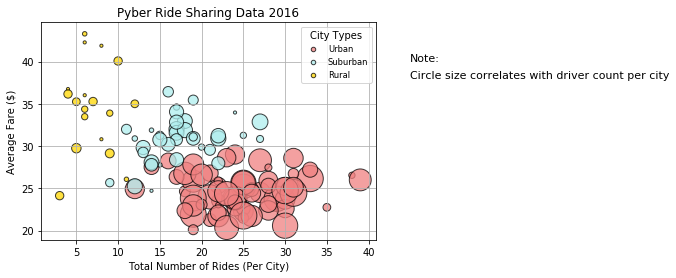

In [22]:
# Obtain the x and y coordinates for each of the three city types
urb_df = comb_data[comb_data['type'] == "Urban"]
sub_df = comb_data[comb_data['type'] == "Suburban"]
rur_df = comb_data[comb_data['type'] == "Rural"]

urb_gp = urb_df.groupby('city')
urb_x = urb_gp['driver_count'].count()
urb_y = urb_gp['fare'].mean()
urb_s = urb_gp['driver_count'].mean()

sub_gp = sub_df.groupby('city')
sub_x = sub_gp['driver_count'].count()
sub_y = sub_gp['fare'].mean()
sub_s = sub_gp['driver_count'].mean()

rur_gp = rur_df.groupby('city')
rur_x = rur_gp['driver_count'].count()
rur_y = rur_gp['fare'].mean()
rur_s = rur_gp['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(x=urb_x, y=urb_y, s=urb_s*10, color='lightcoral', alpha=.75, edgecolors='black', label='Urban')
plt.scatter(x=sub_x, y=sub_y, s=sub_s*10, color='paleturquoise', alpha=.75, edgecolors='black', label='Suburban')
plt.scatter(x=rur_x, y=rur_y, s=rur_s*10, color='gold', alpha=.75, edgecolors='black', label='Rural')

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title('Pyber Ride Sharing Data 2016')

# Create a legend
myLegend = plt.legend(loc='upper right', title="City Types", fontsize = "small")
for legend in myLegend.legendHandles:
    legend.set_sizes([20.0])

# Incorporate a text label regarding circle size
plt.grid()
plt.text(45, 40, "Note:", fontsize=11)
plt.text(45, 38, "Circle size correlates with driver count per city", fontsize=11)
# Save Figure
plt.savefig("Bubble_CityType.jpg")

plt.show()

In [23]:
# Show plot
plt.show()

## Total Fares by City Type

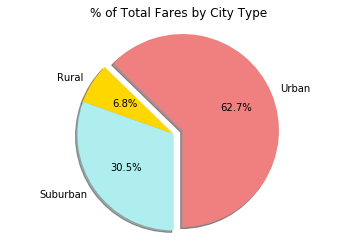

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate Type Percents

urb_per = urb_df['fare'].sum() / comb_data['fare'].sum()
sub_per = sub_df['fare'].sum() / comb_data['fare'].sum()
rur_per = rur_df['fare'].sum() / comb_data['fare'].sum()

# Build Pie Chart

c_type = ["Urban", "Rural", "Suburban"]
pie_per = [urb_per, rur_per, sub_per]
colors = ["lightcoral", "gold", "paleturquoise"]
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(pie_per, explode=explode, labels=c_type, colors=colors, startangle=270, 
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

# Save Figure
plt.savefig("TotalFares_CityType.jpg")

In [25]:
# Show Figure
plt.show()

## Total Rides by City Type

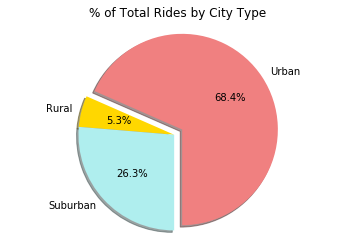

In [26]:
# Calculate Ride Percents
urb_per2 = urb_df['driver_count'].count() / comb_data['driver_count'].count()
rur_per2 = rur_df['driver_count'].count() / comb_data['driver_count'].count()
sub_per2 = sub_df['driver_count'].count() / comb_data['driver_count'].count()

# Build Pie Chart
pie_per2 = [urb_per2,rur_per2,sub_per2]

plt.title("% of Total Rides by City Type")
plt.pie(pie_per2, explode=explode, labels=c_type, colors=colors, startangle=270,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")

# Save Figure
plt.savefig("TotalRides_CityType.jpg")

plt.show()

In [27]:
# Show Figure
plt.show()

## Total Drivers by City Type

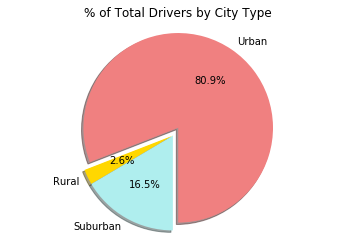

In [30]:
# Calculate Driver Percents
urb_max = urb_gp['driver_count'].max()
sub_max = sub_gp['driver_count'].max()
rur_max = rur_gp['driver_count'].max()

urb_per3 = sum(urb_max) 
sub_per3 = sum(sub_max) 
rur_per3 = sum(rur_max) 


# urb_per3 = urb_df['driver_count'].sum() / comb_data['driver_count'].sum()
# sub_per3 = sub_df['driver_count'].sum() / comb_data['driver_count'].sum()
# rur_per3 = rur_df['driver_count'].sum() / comb_data['driver_count'].sum()

# Build Pie Chart
pie_per3 = [urb_per3, rur_per3, sub_per3]

plt.title("% of Total Drivers by City Type")
plt.pie(pie_per3, explode=explode, labels=c_type, colors=colors, startangle=270,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")

# Save Figure
plt.savefig("Driver_CityType.jpg")

plt.show()

In [29]:
# Show Figure
plt.show()

Final Observations
Urban cities have the highest number of rides.
Urban cities also have the most drivers.
It would not be economically advised to work as a taxi driver in rural cities.